In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [25]:
from datasets import load_dataset

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 下载需要的 nltk 数据
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# 加载 AG News 数据集
dataset = load_dataset('ag_news')
train_data = dataset['train']
test_data = dataset['test']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [7]:
# 查看数据集的大小
print(f"训练集大小: {len(train_data)}")
print(f"测试集大小: {len(test_data)}")

# 查看一个示例
print(train_data[0])

训练集大小: 120000
测试集大小: 7600
{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.", 'label': 2}


In [12]:
# 将数据转为 DataFrame 以便分析
train_df = pd.DataFrame(train_data)

train_df

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1


In [13]:
# 将数据转为 DataFrame 以便分析
test_df = pd.DataFrame(test_data)

test_df

,text,label
0,Fears for T N pension after talks Unions repre...,2
1,The Race is On: Second Private Team Sets Launc...,3
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3
...,...,...
7595,Around the world Ukrainian presidential candid...,0
7596,Void is filled with Clement With the supply of...,1
7597,Martinez leaves bitter Like Roger Clemens did ...,1
7598,5 of arthritis patients in Singapore take Bext...,2


Training Set Category Counts:
World       30000
Sports      30000
Business    30000
Sci/Tech    30000
Name: count, dtype: int64

Testing Set Category Counts:
World       1900
Sports      1900
Business    1900
Sci/Tech    1900
Name: count, dtype: int64


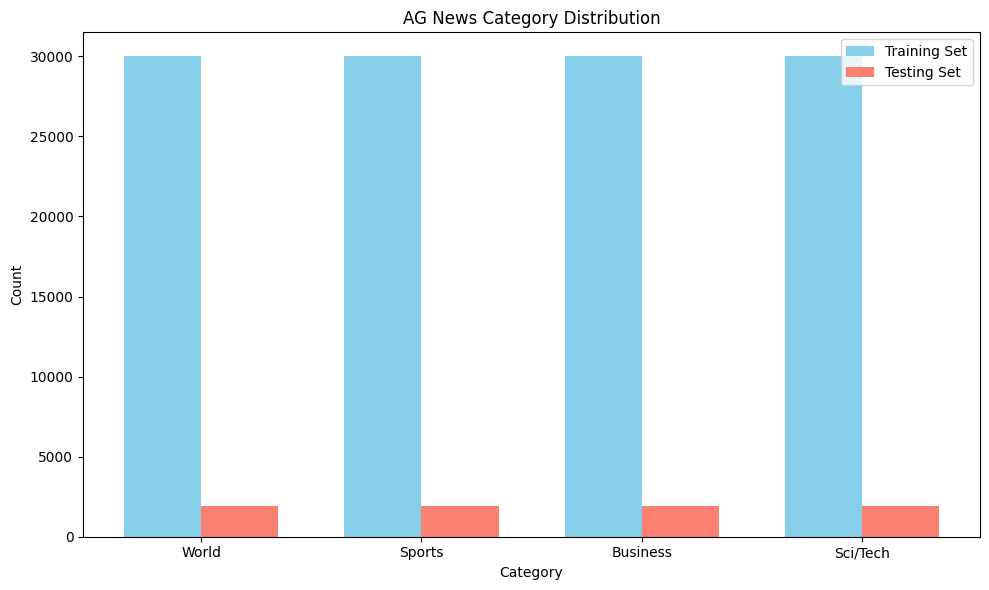

In [20]:
# Define category names
category_names = ['World', 'Sports', 'Business', 'Sci/Tech']

# Get category counts for training and testing datasets, sorted by category index
train_counts = train_df['label'].value_counts().sort_index()
test_counts = test_df['label'].value_counts().sort_index()

# Assign category names to the index for better readability
train_counts.index = category_names
test_counts.index = category_names

# Print category counts
print("Training Set Category Counts:")
print(train_counts)
print("\nTesting Set Category Counts:")
print(test_counts)

# Set the width of the bars and their positions
bar_width = 0.35
indices = np.arange(len(category_names))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot training set bars
plt.bar(indices, train_counts, bar_width, label='Training Set', color='skyblue')

# Plot testing set bars, shifted by bar_width to the right
plt.bar(indices + bar_width, test_counts, bar_width, label='Testing Set', color='salmon')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('AG News Category Distribution')
plt.xticks(indices + bar_width / 2, category_names)
plt.legend()

# Adjust layout to prevent overlapping elements
plt.tight_layout()
plt.show()


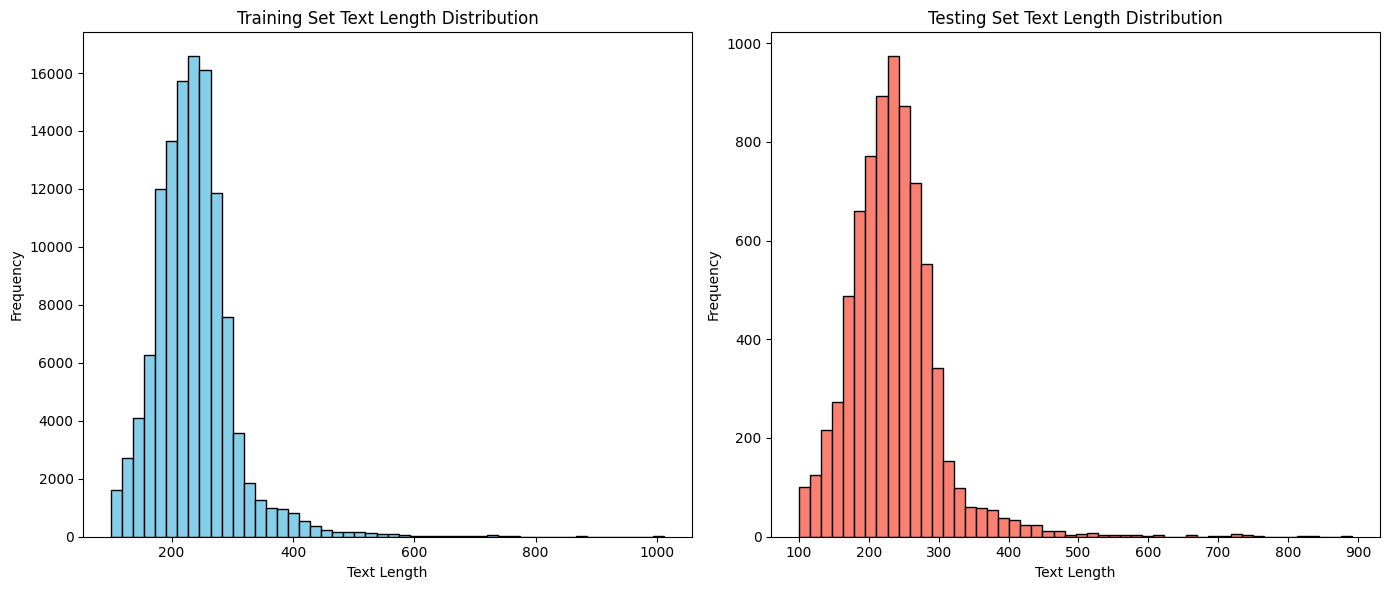

In [22]:
# Calculate the length of the text for the training dataset
train_df['text_length'] = train_df['text'].apply(len)

# Calculate the length of the text for the testing dataset
test_df['text_length'] = test_df['text'].apply(len)

# Set up the plotting area with two subplots side by side
plt.figure(figsize=(14, 6))

# Plot histogram for the training dataset
plt.subplot(1, 2, 1)  # (nrows, ncols, index)
plt.hist(train_df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Training Set Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Plot histogram for the testing dataset
plt.subplot(1, 2, 2)
plt.hist(test_df['text_length'], bins=50, color='salmon', edgecolor='black')
plt.title('Testing Set Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plots
plt.show()

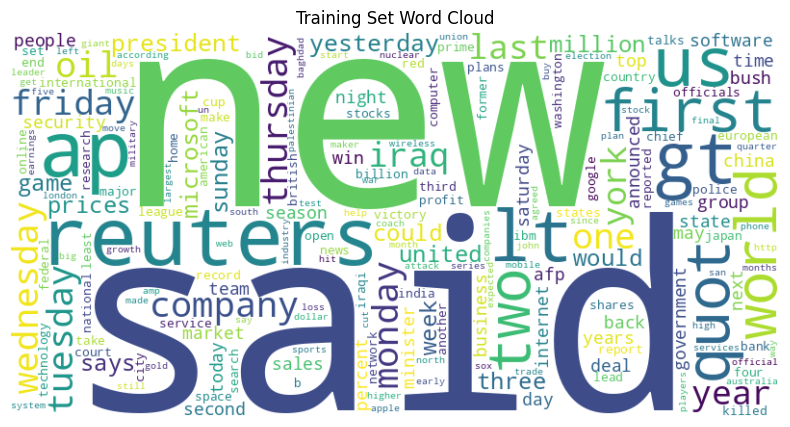

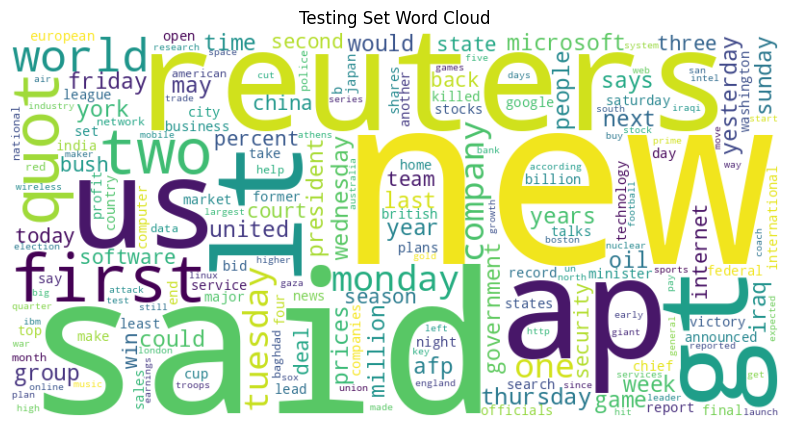

In [26]:
# 获取英语停用词
stop_words = set(stopwords.words('english'))

# 词频统计函数
def get_word_frequency(texts):
    all_words = []
    for text in texts:
        words = word_tokenize(text.lower())
        filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
        all_words.extend(filtered_words)
    return Counter(all_words)

# 从训练集和测试集中提取文本
train_texts = [item['text'] for item in train_data]
test_texts = [item['text'] for item in test_data]

# 分析训练集和测试集的词频
train_word_freq = get_word_frequency(train_texts)
test_word_freq = get_word_frequency(test_texts)

# 生成词云
def generate_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 显示训练集和测试集的词云
generate_wordcloud(train_word_freq, 'Training Set Word Cloud')
generate_wordcloud(test_word_freq, 'Testing Set Word Cloud')